<img src="http://geospatialtraining.com/wp-content/uploads/2017/08/Getting-to-know-the-SciPy-stack.jpg" width="400px">

Numpy and Matplotlib are two important components of the [SciPy](http://scipy.org) scientific library stack, from which we have already met Pandas and been using [iPython](http://ipython.org/) (Interactive Python) as well since it's the basis of the Jupyter notebook infrastructure.

# NumPy

## Constructing arrays

[NumPy](www.numpy.org) is a Python library that supports n-dimensional arrays ("ndarrays") and provides a large number of mathematical functions to manipulate them. NumPy is used "under the hood" by most scientific Python libraries, e.g. Pandas, scikit-learn and Matplotlib.

In [1]:
import numpy as np # the prefix is "np" by convention

NumPy ndarrays can be constructed from other array-like objects, e.g., lists, or from scratch by various types of
constructor functions:

In [2]:
a = np.array([[1,2,3],[4,5,6],[7,8,9]])

print(type(a))

a

<class 'numpy.ndarray'>


array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [3]:
b = np.ones((3,3))

b

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [4]:
c = np.zeros((6,6))

c

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

If we would like to get a "range", that is an enumerated list of elements, we can use:

In [38]:
d = np.arange(10)

d

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

We can any time fill in an array with random numbers

In [35]:
# random sample from a normal distributions

np.random.normal(size=10)

array([-2.04175842, -0.28472292, -1.12523085,  1.03631071,  0.23270352,
        1.258442  , -0.99349858,  0.44402181,  0.4572429 , -0.78849411])

## The shape

Every NumPy ndarray have two crucial attributes, its **shape**, which is a tuple containing the array's dimensions, and its **dtype**, i.e. data type. The latter is common for all elements of the array, i.e. if the array's dtype is np.float64 then all elements of the array are of this type.

In [5]:
print(a.shape)
print(a.dtype)
print(b.dtype)

(3, 3)
int64
float64


**Important**: NumPy distinguishes (one-dimensional) vectors and 2-dimensional matrices with 1 width or height:

In [6]:
v = np.array([1,2,3,4,5])
print(v)
print(v.shape)
m = np.array([[1,2,3,4,5]])
print(m)
print(m.shape)

[1 2 3 4 5]
(5,)
[[1 2 3 4 5]]
(1, 5)


**The vector and the matrix with one dimension set to one are _not_ equal!!!**


## The types

The most importanty NumPy types we will meet are

- unsigned integer types: uint8,...,uint64
- integer types: int8,..., int64
- float types: float8,...,float32,
- the boolean type: bool
- string types for strings of various length. e.g. <U5 for unicode string shorter than 5 chars.
- a general "object" type for arrays that can contain any Python object.

The dtype of an array can be specified in its constructor:

In [7]:
c = np.array([1,2,3,4], np.uint8)

c.dtype

dtype('uint8')

If no bit length is specified then a default one is chosen depending on the current system, e.g. for 64bit Linux

In [8]:
d = np.array([1,2], np.int)

d.dtype

dtype('int64')

if no dtype is specified then NumPy tries to be smart and choose a narrow  dtype that covers all elements, occasionally converting elements:

In [9]:
e = np.array([[1,2,3]])
print(e.dtype)
e = np.array([[1.,2,3]])
print(e.dtype)
e = np.array([["1.",2,3]])
print(e.dtype)
e = np.array([[[1],2,3]])
print(e.dtype)

int64
float64
<U2
object


## Indexing

NumPy supports the usual Python indexing and slicing syntax for ndarrays along all dimensions/axes and adds certain extensions.

In [10]:
a

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [11]:
print(a[2,2])
a[:,2]

9


array([3, 6, 9])

In [12]:
print(a[:2,1:])

[[2 3]
 [5 6]]


The three most important extensions:

In [13]:
# If only a k<n number of index ranges are given for an n-dimensional array
# then the ranges are assumed to apply to the first k axes/dimensions and the whole range
# (e.g. ":") will be used for the remaining axes/dimensions.
a[1]

array([4, 5, 6])

In [14]:
a[:-1]

array([[1, 2, 3],
       [4, 5, 6]])

In [15]:
# Index vectors/lists can also be used to select elements
a[[0,2]]

array([[1, 2, 3],
       [7, 8, 9]])

In [16]:
# Slices can be given a 'step' parameter after a second colon:
v = [0,1,2,3,4,5,6,7,8,9,10]
v[2::2]

[2, 4, 6, 8, 10]

Iteration is always along the first dimension:

In [17]:
for row in a: print(row)

[1 2 3]
[4 5 6]
[7 8 9]


If needed, an **iterator** over all items can be accessed via the "flat" attribute:

In [18]:
for element in a.flat: print(element)

1
2
3
4
5
6
7
8
9


If we would like to get back the real transformed matrix, we have to use `.flatten()`

"...flatten consumes more memory and cpu, as it creates a new array, while flat only creates the iterator object, which is super fast."

In [37]:
print(a.flatten().shape)

(9,)


We can also choose elements of the array randomly:

In [43]:
random_sample = np.random.choice(a.flatten(),3, replace=False)

print(random_sample)

[2 3 8]


## Mathematical operations

NumPy provides a huge number of mathematical functions (from linear algebra, probability theory, analysis etc.) that operate on ndarrays. A few simple examples:

In [19]:
m = np.array([[1,2],[3,4]])

print(m * m) # element-wise (Hadamard-) product

[[ 1  4]
 [ 9 16]]


In [20]:
print(np.matmul(m,m)) # matrix multiplication

[[ 7 10]
 [15 22]]


In [34]:
# Matrix transpose - which will come in handy for later on - is just .T
q = np.array([[1,2],[3,4],[5,6]])

print(q, "\n")

print(q.T)

[[1 2]
 [3 4]
 [5 6]] 

[[1 3 5]
 [2 4 6]]


## Further reading

+ A simple tutorial is provided by https://docs.scipy.org/doc/numpy/user/quickstart.html
+ For a more in-depth introduction (combined with Matplotlib) see http://www.scipy-lectures.org/intro/numpy/numpy.html

# Matplotlib

[Matplotlib](https://matplotlib.org/) is a widely used Python plotting library which we have already been using via Pandas to plot dataset histograms, scatter diagrams etc. Since Pandas exposes only a small fragment of Matplotlib's functionality, and its plotting capabilities are limited to data held in data frames, there are many situations when a direct use of Matplotlib is unavoidable.

Matplotlib has, in fact, two user-facing APIs -- a simple procedural one called Pyplot which is modeled after MATLAB's plotting functionality and a way more sophisticated and versatile object-oriented one. This short introduction concentrates on the the procedural Pyplot API -- for the object-oriented API see the [Matplotlib documentation](https://matplotlib.org/api/pyplot_summary.html#the-object-oriented-api).

## Basic concepts

Matplotlib is built around a few fundamental concepts:

+ a **figure** is an independent container for graphical elements which can be presented in a separate GUI window/area when displayed. All Pyplot graphical elements are contained in figures. Pyplot commands either create figures or change them e.g. by adding elements (plots etc.);
+ **axes** are rectangular areas with a corresponding coordinate system in a figure on which graphical elements can be placed;
+ an **axis** is one of the axes (sorry...)  of an axes objects: a number-line like object with associated numerical limits;
+ **subplots** are sets of axes arranged in a regular grid which can be accessed by their position in the grid;
+ finally, **artists** are the graphical elements (lines, texts, images etc.) that can be placed on a figure (typically with the help of axes).

<img src="https://matplotlib.org/1.5.1/_images/fig_map.png">

(Image source: [matplotlib.org](http://matplotlib.org/1.5.1))

The Pyplot workflow in the context of Jupyter notebooks is to create a figure with one or more axes (often implicitly). place graphical elements on it at locations identified with the help of subplots/axes, and, finally, display/render the figure by calling `plt.show()`. During the process pyplot keeps track of the current figure and current axes, which can be queried by the **gcf** and **gca** functions:

In [22]:
from matplotlib import pyplot as plt # By convention

plt.figure() # This creates a figure with the default settings and with associated axes
print(plt.gcf())  # Get the current figure object and print its parameters
print(plt.gca())  # Get the current axes object and print its parameters
plt.show(); # Show the (in essence empty) figure

Figure(640x480)
AxesSubplot(0.125,0.11;0.775x0.77)


<Figure size 640x480 with 1 Axes>

As the above example shows axes, by default, already bring visualized axis objects with themselves, that is, the visualization of their boundaries with numbered ticks. This visualization can be configured in various ways, e.g.:

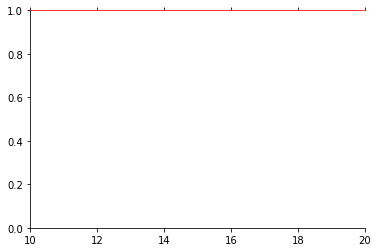

In [23]:
axes = plt.gca() # This implicitly creates a figure and axes
axes.spines["top"].set_color("red") # spines are the displayed boundaries
axes.spines["right"].set_color(None)
axes.set_xlim((10,20)) # set the horizontal limits
axes.xaxis.set_ticks_position("both") # put horizontal ticks to the top as well
plt.show();

Let's try to use more than one axes regions in a figure.

Axes(0.1,0.1;0.8x0.8)
Axes(0,0;0.5x0.5)


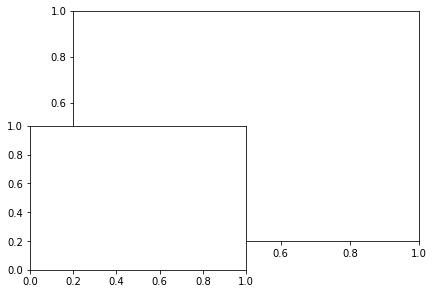

In [24]:
plt.axes((.1, .1, .8, .8)) # dimensions are given as left, bottom, width, height in figure-relative coordinates
                           # and units, (0,0,1,1) would cover the entire figure
print(plt.gca())
plt.axes((0, 0, 0.5, 0.5))
print(plt.gca())
plt.show();

Using subplots we can easily produce axes arranged in a grid:

AxesSubplot(0.125,0.536818;0.227941x0.343182)
AxesSubplot(0.672059,0.125;0.227941x0.343182)
AxesSubplot(0.125,0.125;0.227941x0.343182)


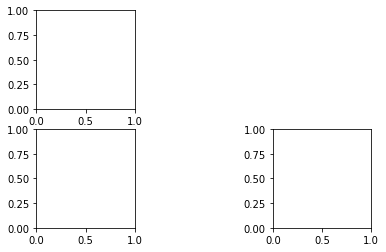

In [25]:
plt.subplot(2, 3, 1) # Axes in the 1st position of a 2 row x 3 col. grid and 
print(plt.gca())
plt.subplot(2, 3, 6) # Axes in the 6th position of the same grid 
print(plt.gca())
# If nrows, ncols and plot_number are all < 10 then they can be specified as a single
# 3 digit number:
plt.subplot(234) # Axes in the 4th position -- positions are numbered by taking the elements
                 # of the first row first etc.
print(plt.gca())
plt.show();

As we have seen so far, the procedural API is highly stateful in the sense that it has the notions of "current figure", "current axes" etc. which are often changed implicitly by Pyplot commands. This is useful for relatively simple plots but can be confusing and difficult to handle programatically in the case of complex figures consisting of a high number of subplots axes etc. In these situations it is useful to create figure(s) and axes explicitly in a more transparent, object-oriented style:

AxesSubplot(0.125,0.125;0.352273x0.755) AxesSubplot(0.547727,0.125;0.352273x0.755)


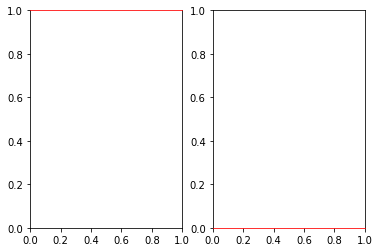

In [26]:
figure, axes = plt.subplots(1, 2) # 1x2 grid -- returns the figure and created axes explicitly
ax1, ax2 = axes
print(ax1, ax2)
ax1.spines["top"].set_color("red")
ax2.spines["bottom"].set_color("red")
plt.show()

The above "design pattern" is usable with a single axes object as well:

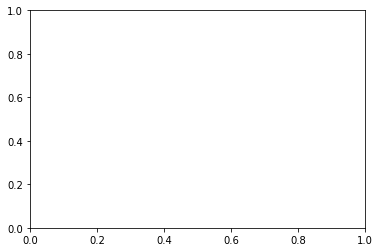

In [27]:
figure, ax = plt.subplots() # "grid" with a single cell
plt.show()

## Ready-made plot types

Although Matplotlib offers a huge variety of graphical elements ("artists") that can be added to a figure (see the [Artist tutorial](https://matplotlib.org/users/artists.html), most daily plotting tasks can be accomplished by utilising  a few ready made plot types. The _data points_ for these plots have to bee specified in the form of one or more __iterables__ that are typically lists, NumPy ndarrays or Pandas dataframe columns. 

We have already met Matplotlib's scatter. histogram and box plots using Pandas:

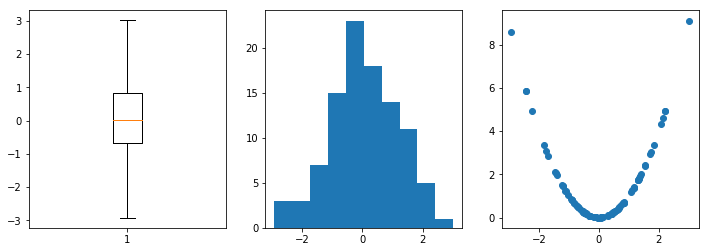

In [28]:
xs = np.random.normal(size=100)
ys = xs * xs

plt.figure(figsize=(12, 4)) # Set figure size

plt.subplot(131)
plt.boxplot(xs)

plt.subplot(132)
plt.hist(xs)

plt.subplot(133)
plt.scatter(xs, ys)

plt.show();

Notice that the axis limits were automatically set to sensible values. In addition to these, Matplotlib also supports simple "elementary school type" line plots:

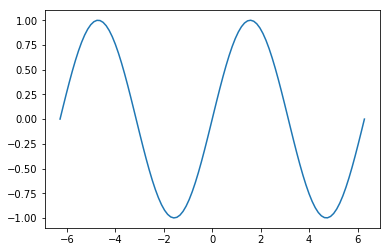

In [29]:
# Simple "function plot"
import math

xs = np.linspace(start=-2*math.pi, stop=2*math.pi, num=100) # linspace returns "evenly spaced numbers over a specified interval."
sin_vals = [math.sin(x) for x in xs]
plt.plot(xs, sin_vals)
plt.show();

Legends, etc. can also be set:

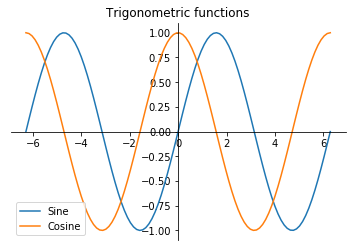

In [30]:
xs = np.linspace(start=-2*math.pi, stop=2*math.pi, num=100) # linspace returns "evenly spaced numbers over a specified interval."
sin_vals = [math.sin(x) for x in xs]
cos_vals = [math.cos(x) for x in xs]

fig, ax = plt.subplots() # We will need the axes

plt.plot(xs, sin_vals, label="Sine")
plt.plot(xs, cos_vals, label="Cosine")

# Move lower spines to the center
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Print legend and title
plt.legend()
plt.title("Trigonometric functions") # Add a label to the a axis

plt.show();

The familiar "bar" and "pie charts" are also available, e.g.

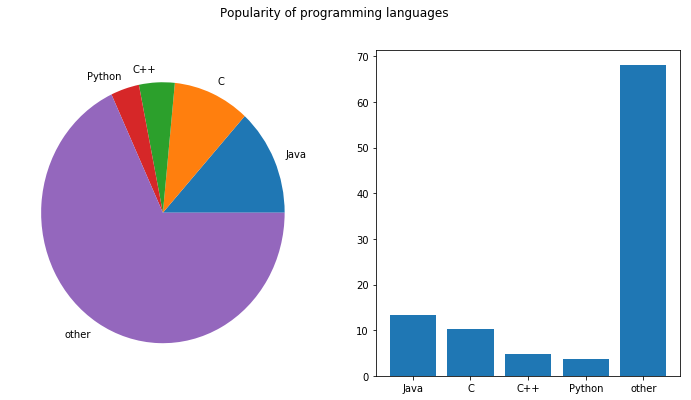

In [31]:
data = [13.27, 10.16, 4.73, 3.78, 68.06] # The numerical values to chart
labels = ["Java", "C", "C++", "Python", "other"]

plt.figure(figsize=(12,6)) # Set fig size to have a proper circle

plt.subplot(121)
plt.pie(data, labels=labels)

plt.subplot(122)
positions = range(len(data)) # Positions of the bars
plt.bar(positions, data)
plt.xticks(positions, labels)

plt.suptitle("Popularity of programming languages") # Suptitle sets a title for the whole figure

plt.show();

## Further reading

We have only scratched the surface of what Matplotlib can do. Almost every aspect of the plots is configurable, one can display images on axes, add annotations etc, and there is a complete toolkit, [mplot3d](https://matplotlib.org/tutorials/toolkits/mplot3d.html) to support 3d plotting with 3d axes.

For more information see

+ [Matplotlib chapter of the SciPy Lecture Notes](http://www.scipy-lectures.org/intro/matplotlib/index.html),
+ [Matplotlub User's Guide](https://matplotlib.org/users/index.html).